In [220]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# Getting Data

In [221]:
#Download the data

def load_housing_data():
  tarball_path=Path('datasets/housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True, exist_ok=True)
    url='https://github.com/ageron/data/raw/main/housing.tgz'
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarbell:
      housing_tarbell.extractall(path='datasets')
  return pd.read_csv(Path('datasets/housing/housing.csv'))

housing=load_housing_data()

In [222]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [223]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [224]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [225]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [226]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

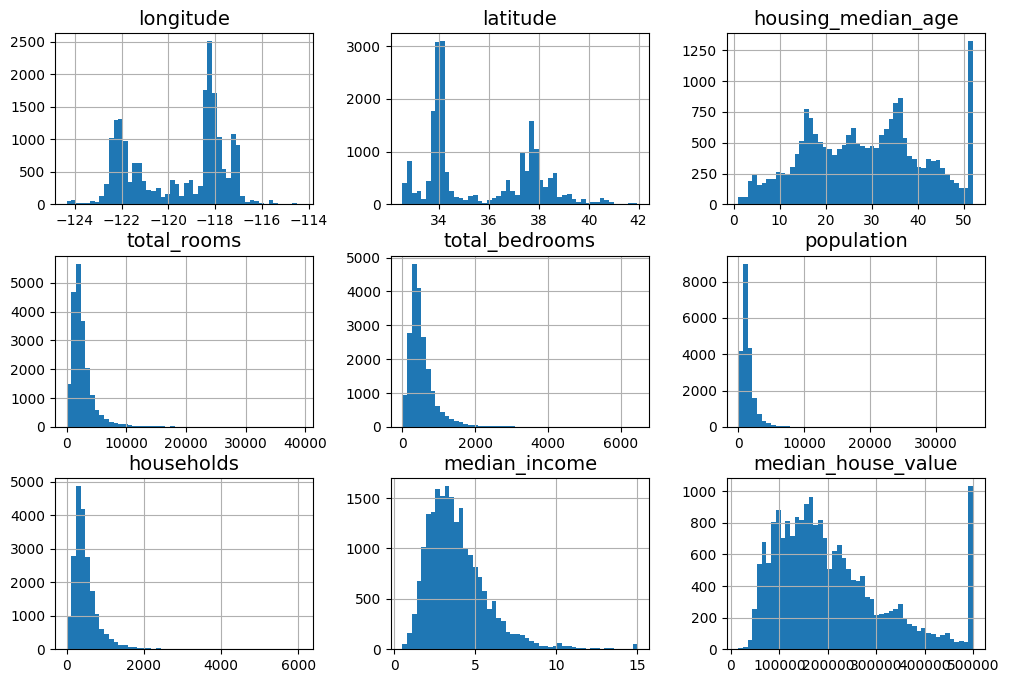

In [227]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()



# Create Test Set

In [228]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices=np.random.permutation(len(data))
  test_set_size=int(len(data)* test_ratio)
  test_indices=shuffled_indices[:test_set_size]
  train_indices=shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [229]:
train_set, test_set=shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [230]:
len(test_set)

4128

In [231]:
np.random.seed(42)

In [232]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier))<test_ratio * 2 **32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [233]:
housing_with_id=housing.reset_index() #adds an 'index' column

train_set, test_set=split_data_with_id_hash(housing_with_id, 0.2, 'index')

In [234]:

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [235]:
from sklearn.model_selection import train_test_split

train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)

In [236]:
test_set['total_bedrooms'].isnull().sum()

44

In [237]:
housing['income_cat']=pd.cut(housing['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1,2,3,4,5]
                             )

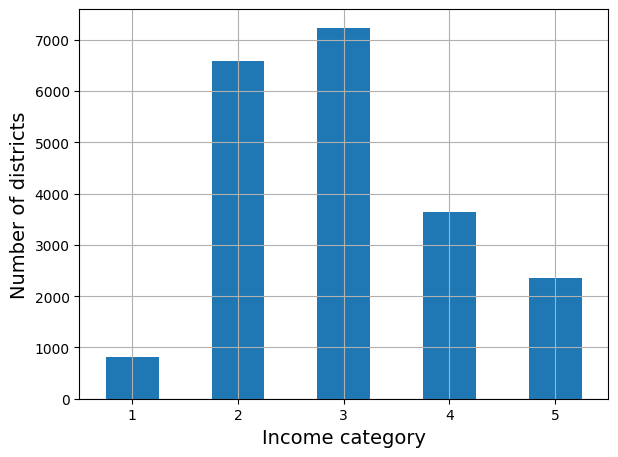

In [238]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [239]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits=[]

for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set_n=housing.iloc[train_index]
  strat_test_set_n=housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])


In [240]:
strat_train_set, start_test_set=strat_splits[0]

In [241]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [242]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [243]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualization of Data to gain insights

In [244]:

housing = strat_train_set.copy()

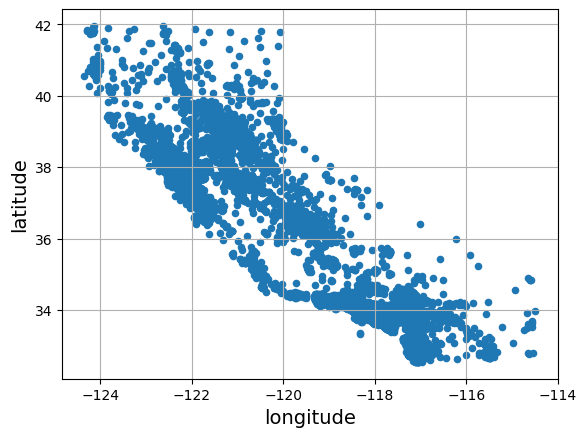

In [245]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
plt.show()

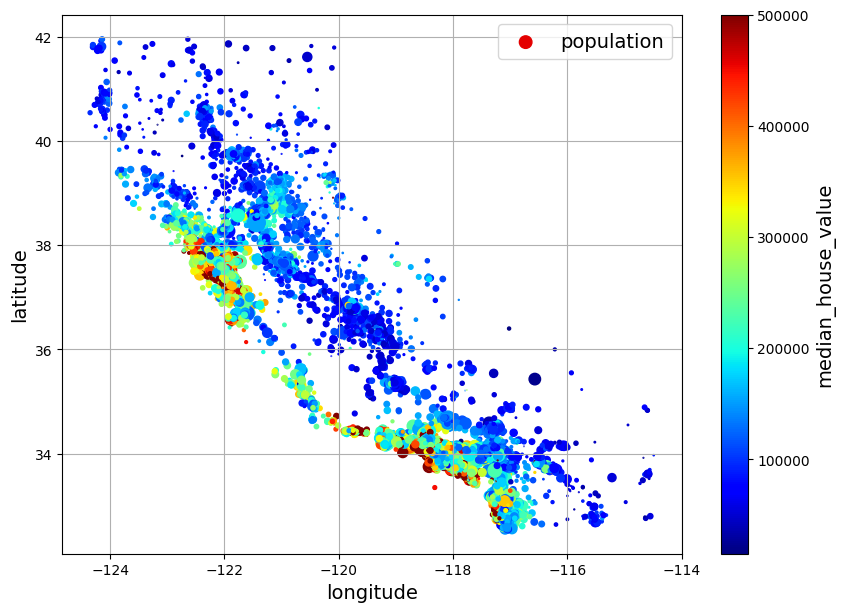

In [246]:
housing.plot(kind='scatter',x='longitude', y='latitude', grid=True,
             s=housing['population'] / 100, label='population',
             c='median_house_value', cmap='jet', colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

In [247]:
corr_matrix = housing.corr(numeric_only=True)

In [248]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

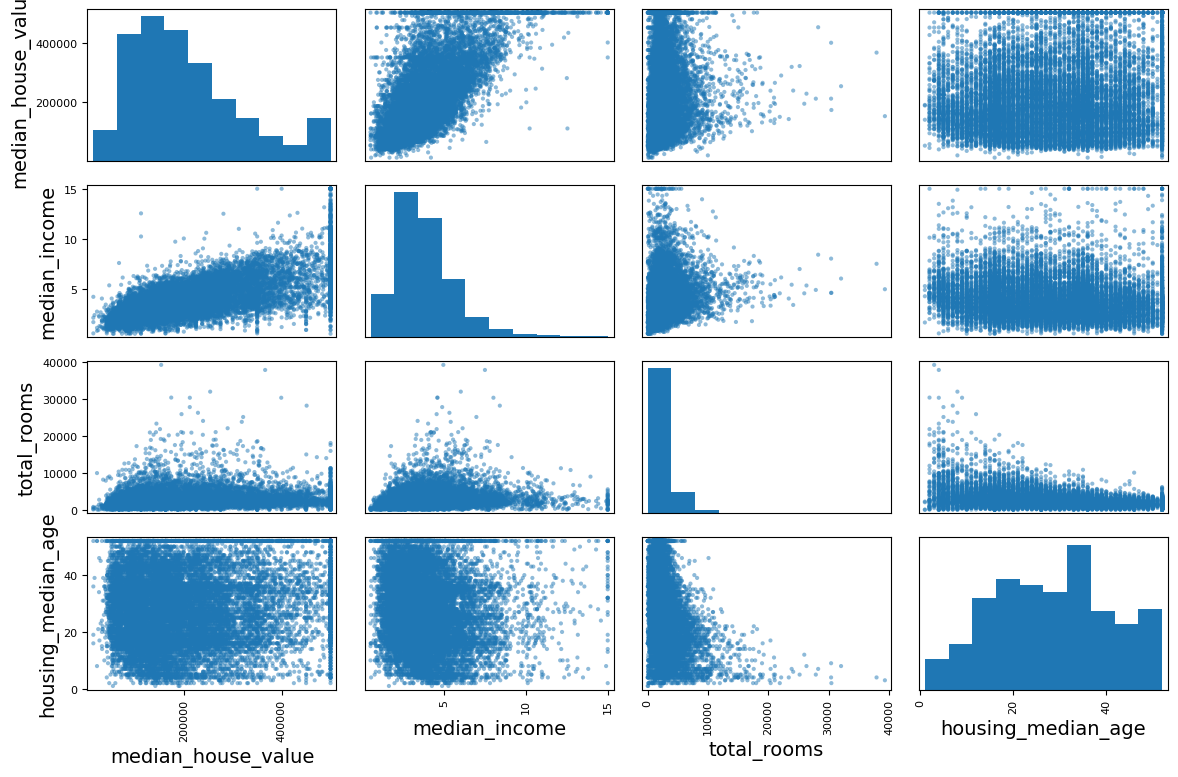

In [249]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [251]:

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Prepare the data for machine learning algorithms

In [252]:
housing=strat_test_set.drop('median_house_value', axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

# Data cleaning

In [253]:
null_rows_idx=housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7434,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND
2186,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
15297,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,<1H OCEAN
3111,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696,NEAR OCEAN
6407,-117.27,32.85,26.0,1373.0,NaN,608.0,268.0,4.4250,NEAR OCEAN


In [254]:
#option1- drop null value from 'total bedrooms'
#option2- drop column 'total bedrooms'
#option3 - replace null value with median

housing_option3=housing.copy()   

median=housing['total_bedrooms'].median()
housing_option3['total_bedrooms'].fillna(median, inplace=True)

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7434,-117.73,34.10,37.0,3457.0,438.0,1344.0,530.0,5.8891,INLAND
2186,-118.72,34.28,17.0,3051.0,438.0,1705.0,495.0,5.7376,<1H OCEAN
15297,-118.23,34.18,45.0,2332.0,438.0,943.0,339.0,8.1132,<1H OCEAN
3111,-117.14,32.71,52.0,500.0,438.0,480.0,108.0,1.8696,NEAR OCEAN
6407,-117.27,32.85,26.0,1373.0,438.0,608.0,268.0,4.4250,NEAR OCEAN


In [255]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

In [256]:
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [257]:
housing_num.median().values

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [258]:
# Transforming the training set:

X=imputer.transform(housing_num)

In [259]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [260]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [261]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037


## For outliers

In [262]:
from sklearn.ensemble import IsolationForest

isolation_forest=IsolationForest(random_state=42)
outlier_pred=isolation_forest.fit_predict(X)

In [263]:
outlier_pred

array([ 1,  1, -1, ...,  1,  1,  1])

## Handling Text and Categorical Attributes

In [264]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(9)

,ocean_proximity
3905,<1H OCEAN
16821,<1H OCEAN
2900,NEAR OCEAN
7193,NEAR OCEAN
13928,NEAR BAY
6523,<1H OCEAN
33,NEAR BAY
15996,<1H OCEAN
18212,NEAR OCEAN


In [265]:
from sklearn.preprocessing import OrdinalEncoder

ode=OrdinalEncoder()
housing_cat_encoded=ode.fit_transform(housing_cat)

In [266]:
housing_cat_encoded[:8]

array([[0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.]])

In [267]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [268]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [269]:
cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [270]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [271]:

cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [272]:

df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [273]:

cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [274]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [275]:

df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# Feature Scaling

In [283]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [284]:

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

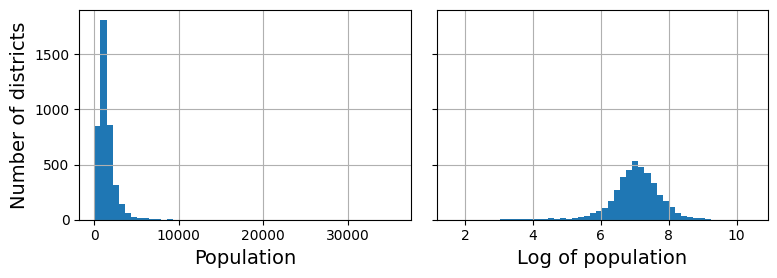

In [285]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

In [286]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [287]:

from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [4128, 16512]